**IST664 - Lab for Week 2 - Morphology, Tokenization, Stemming, Corpus Linguistics**

In today’s class we examined the next level up from phonology: morphology, AKA the structure of words. NLP processes use morphology to assist with tokenization, stemming, lemmatization, and part of speech tagging. 

Corpus linguistics pertains to describing overviews of tokens derived from a corpus. As a reminder, a corpus (plural: corpora) is simply a  body of text. Corpus-linguistic analyses are often based on the evaluation of word occurrence frequencies within a corpus or across corpora. Conducting corpus-linguistic analyses usually begins with pre-processing and tokenizing the texts. 

In this lab session, we will use NLTK to do some of these tasks. Similarly to last week, we will use some text from Project Gutenberg texts. This time, however, we are going to work with "raw" text rather than the pre-processed data structures that NLTK also provides, so that we can do some more detailed work. In particular, we are going to make our own token lists, filter them, and use some tools that calculate ocurrence frequencies. Note that documentation on how to create and manipulate corpora appears in this chapter of the NLTK book: http://www.nltk.org/book/ch02.html 

###Part 1 - Tokenization Tricks from NLPIA
In Chapter 2, NLPIA begins to dig into the details of how tokenization allows us to create data representations of documents that can be used for downstream analysis. In the following code, make sure to pay attention to the data structures used to represent sentences.

In [1]:
# Here's a reminder of some tokenization code from NLPIA:
sentence = """Thomas Jefferson began building Monticello at the 
age of 26."""

sentence.split()

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [2]:
# split() is a bound method for any Python string and it defaults to splitting
# on spaces. This is an equivalent function call:
str.split(sentence)

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [3]:
# Now let's start to build an array of "one hot encoded" tokens. One hot encoding
# will become very important later in the course.
import numpy as np
token_sequence = str.split(sentence) # Split at spaces, save the result
vocab = sorted(set(token_sequence)) # Get a sorted list of the unique tokens
', '.join(vocab) # Show them as a comma-separated sequence

'26., Jefferson, Monticello, Thomas, age, at, began, building, of, the'

In [4]:
num_tokens = len(token_sequence) # Count the total number of tokens
vocab_size = len(vocab) # And the size of the vocabulary
onehot_vectors = np.zeros((num_tokens, vocab_size), int) # Fill an array with zeroes

# Now build a list of num_tokens vectors, where just a single value of 1 is 
# filled in for each one. Note: enumerate() is a powerful Python construct that 
# steps through the elements of an object, returning an index and the corresponding 
# element. The index can be helpful for manipulating other data structures.
for i, word in enumerate(token_sequence):
  onehot_vectors[i, vocab.index(word)] = 1

onehot_vectors # Show the results

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Note how a "one hot" vector lives up to its name. In each row of this matrix, there is one and only one entry that is set to one. In this matrix, each column therefore represents one type of token - i.e., one element of our vocabulary (in alphabetical order as it turns out). The rows in the case indicate the individual entries in this particular sentence. The displays below present the same data but with some better labeling and in the second display a suppresion of displaying the zeroes.

In [5]:
# Finally, stick the result in a Pandas dataframe
import pandas as pd
df1 = pd.DataFrame(onehot_vectors, columns=vocab) # Create the dataframe
df2 = df1.copy() # Make a copy
df2[df2 == 0] = '' # Fill in with blanks to show the idea of a sparse matrix
print(df1) # This is the full version with zeroes
print(df2) # This is the sparse version with blanks

   26.  Jefferson  Monticello  Thomas  age  at  began  building  of  the
0    0          0           0       1    0   0      0         0   0    0
1    0          1           0       0    0   0      0         0   0    0
2    0          0           0       0    0   0      1         0   0    0
3    0          0           0       0    0   0      0         1   0    0
4    0          0           1       0    0   0      0         0   0    0
5    0          0           0       0    0   1      0         0   0    0
6    0          0           0       0    0   0      0         0   0    1
7    0          0           0       0    1   0      0         0   0    0
8    0          0           0       0    0   0      0         0   1    0
9    1          0           0       0    0   0      0         0   0    0
  26. Jefferson Monticello Thomas age at began building of the
0                               1                             
1             1                                               
2       

Notice in the displays above how the original word order is represented in the data structure. For example, the first row (row 0) has a "1" in the Thomas column, because Thomas was the first token in the original string.

In [6]:
# Next we will extend the idea of one hot encoding so that we can represent 
# the tokens that appear in multiple sentences. Here we treat each sentence as
# a document.
#
# Let's make a list of two sentences:
sentences = """Thomas Jefferson began building Monticello at the age of 26.\n"""
sentences += """Local masons and carpenters began constructing the building."""

# This time we will construct a term document matrix using the tokens from
# both sentences. We will use a Python dictionary to help with this process.
corpus = {} # Start an empty dictionary
for i, sent in enumerate(sentences.split('\n')): 
  corpus['sent{}'.format(i)] = dict((tok, 1) for tok in sent.split())

corpus

{'sent0': {'Thomas': 1,
  'Jefferson': 1,
  'began': 1,
  'building': 1,
  'Monticello': 1,
  'at': 1,
  'the': 1,
  'age': 1,
  'of': 1,
  '26.': 1},
 'sent1': {'Local': 1,
  'masons': 1,
  'and': 1,
  'carpenters': 1,
  'began': 1,
  'constructing': 1,
  'the': 1,
  'building.': 1}}

In [7]:
# Next we can create a pandas data frame from the dict
df3 = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T

df3

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.,Local,masons,and,carpenters,constructing,building.
sent0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
sent1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,1


This dataframe contains the "classic" form of a term-document matrix, with terms arrayed as columns and documents as rows. Each cell therefore represents a count of occurrences of a particular token within one document. For these two sentences, only two of the tokens appear more than once, so it is pretty boring. We do have prepackaged functions for making DTMs, so in the future we will not have to program this kind of loop ourselves.

In [9]:
# We can measure overlap between sentences with the dot product
df4 = df3.T # Transpose the df3 matrix for the calculation
df4.sent0.dot(df4.sent1) # How much overlap?

2

In [59]:
#
# Exercise 2.1: Add a third sentence to the list of sentences just above.
# Write a new sentence that has some overlap in words with the first two.
# Re-process the last few code blocks to recreate the data frame. Calculate
# all three of the pairwise dot products.
#
sentences = """Thomas Jefferson began building Monticello at the age of 26.\n"""
sentences += """Local masons and carpenters began constructing the building.\n"""
sentences += """The building was constructed using Local materials.""" #Since we haven't done lower I'm using "L"ocal
corpus = {} # Start an empty dictionary
for i, sent in enumerate(sentences.split('\n')): 
  corpus['sent{}'.format(i)] = dict((tok, 1) for tok in sent.split())

dfT = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T
dfOverlap = dfT.T # Transpose the df3 matrix for the calculation
# How much overlap?
print("Sent0 and Sent 1 : ",dfOverlap.sent0.dot(dfOverlap.sent1))
print("Sent0 and Sent 2 : ",dfOverlap.sent0.dot(dfOverlap.sent2))
print("Sent1 and Sent 2 : ",dfOverlap.sent1.dot(dfOverlap.sent2))
 

Sent0 and Sent 1 :  2
Sent0 and Sent 2 :  1
Sent1 and Sent 2 :  1


### Part 2
The code blocks above demonstrate several important concepts from Chapter 2 of NLPIA on a very small data set of short sentences. Let's move on now to getting a large dataset of sentences from the Jane Austen novel, "Emma." We can tokenize and describe Emma using some similar techniques.

In [20]:
# In this code, we import the NLTK, download the Gutenberg texts, extract a 
# list of file identifiers from the downloaded material and show the filename
# for the first file in the list, Emma, by Jane Austen.

import nltk # Bring in the NLP toolkit
nltk.download('gutenberg') # Then import the Gutenberg library, which has books
print(nltk.corpus.gutenberg.fileids())
file0 = nltk.corpus.gutenberg.fileids()[0] # Extract the book names
print(file0)

[nltk_data] Downloading package gutenberg to /root/nltk_data...


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
austen-emma.txt


[nltk_data]   Unzipping corpora/gutenberg.zip.


In [52]:
emmatext = nltk.corpus.gutenberg.raw(file0) # Get the raw text of the book
print (len(emmatext)) # This tells the length of the string in characters
print(type(emmatext)) # And this shows the type of the emmatext object.

# What function call could we add to get a "directory" of all of the attributes
# of emmatext, including the bound methods?

#
# Exercise 2.2: Add the requested function call and then rerun this cell.
#dir() will display all the attributes and bound methods
dir(emmatext)

887071
<class 'str'>


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


We now have the text as a string of characters, and the len() function has told us how many characters are in that text. The type() function has shown us that the data type is "str" for string. Remember that in Python a string is an immutable type that we can "slice" using the square brackets slicing technique.

In [22]:
emmatext[:120] # Show the first 120 characters

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nan'

As you know from the readings, tokenizing seems easy but has many complications. There are many code implementations of tokenization (in a variety of programming languages). Let's retest the ones we tried during class.

In [60]:
# Each of these print statements shows the number of tokens yielded by different
# tokenization techniques.
print(len(emmatext.split())) # The builtin Python split function

import re
print(len(re.findall("[\w]+", emmatext))) # A simple regex that splits on words

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#
# Exercise 2.3: Use the word_tokenize() function that we just imported to 
# find out how many tokens are yielded by that method. Print the result.
#
wor_tokens = word_tokenize(emmatext)
print(len(wor_tokens))
#191776 number of tokens

158167
161983


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


191776


As the numbers above show, the tokenizer you choose has a substantial effect on the number of tokens that are yielded. NLTK has several tokenizers available. We will next use a sentence tokenizer to divide the Emma text into about 7500 separate sentences, then we will create a DTM to represent those sentences.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

emmasentences = nltk.sent_tokenize(emmatext)

vectorizer = CountVectorizer()
emma_dtf = vectorizer.fit_transform(emmasentences)

emma_dtf.shape

(7456, 7239)

Make sure you understand the two numbers just presented. The shape attribute shows the number of rows and the number of columns. The rows of this emma_dft data structure contain the sentences and the columns the tokens/terms. 

In [28]:
# Let's examine some of our tokens in the DTM
token_names = vectorizer.get_feature_names_out()
print(len(token_names)) # Total number of terms in our DTM
token_names[0:20] # The first 20 elements of the DTM

7239


array(['000', '10', '1816', '23rd', '24th', '26th', '28th', '7th', '8th',
       '_______', '_a_', '_accepted_', '_adair_', '_addition_', '_all_',
       '_almost_', '_alone_', '_amor_', '_and_', '_answer_'], dtype=object)

In [29]:
# Let's find a few sentences that we can compare using dot products
print(emmasentences[50])
print()
print(emmasentences[56])
print()
print(emmasentences[100])

And as for James, you may be very sure he will always like
going to Randalls, because of his daughter's being housemaid there.

It was very lucky, for I would
not have had poor James think himself slighted upon any account;
and I am sure she will make a very good servant: she is a civil,
pretty-spoken girl; I have a great opinion of her.

Mr. Knightley loves to find fault with me, you know--
in a joke--it is all a joke.


Which two of these three sentences do you expect will have the most in common? Remember that a dot product takes two vectors of equal length and sums the products of each pair of entries. The sum is therefore a scalar and can be interpreted as a measure of similarity.

In [30]:
sent50 = emma_dtf[50]
sent50

<1x7239 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [31]:
sent56 = emma_dtf[56]
sent56

<1x7239 sparse matrix of type '<class 'numpy.int64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [32]:
sent50.dot(sent56.T).toarray() # We take the transpose of sent56

array([[8]])

In [33]:
sent100 = emma_dtf[100]
sent100

<1x7239 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [34]:
sent50.dot(sent100.T).toarray()

array([[2]])

In [35]:
#
# Exercise 2.4: Interpret the results of the two dot products by writing
# a comment saying which pair of sentences is more similar. Compute and
# interpret the third possible dot product (between sent56 and sent100).

#Sentences 50 and 56 are more similar, as they have 8 words in common, compared to other two dot products which have 2 words in common
#Sentences 50 and 56 talk about "daughter" and her being a housemaid/servant. Other pairs dont have much in common
sent56.dot(sent100.T).toarray()

array([[2]])

Let's switch back to looking at the whole book and examine some of the implications of filtering the token stream.

In [61]:
emmatokens = nltk.word_tokenize(emmatext) # Break the string into tokens
# Next, we will use a list comprehension to process each token into lowercase.
emmawords = [w.lower() for w in emmatokens]
print(len(emmawords)) # How many tokens before filtering?

alphaemmawords = [w for w in emmawords if w.isalpha()] # Only keep alpha tokens
print(len(alphaemmawords)) # How many tokens after filtering?

nltk.download('stopwords') # Let's try taking out the stopwords beforehand
nltk_stops = nltk.corpus.stopwords.words('english')
# Use a list comprehension to remove stop words
emmanostops = [w for w in alphaemmawords if w not in nltk_stops]

# Compare the lengths of the token lists before and after stop word removal
print(len(emmanostops))
#There are many words before filtering punctuations - 191776
#After removing punctuations we have 157035 words
#After we remove stop words we have only about 70000 words

191776
157035


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


69617


In [38]:
#
# Exercise 2.5: Examine the first 20 entries in alphaemmawords. Also examine
# the first 20 entries in emmanostops. Write a comment on what you see.
#
print("Alphaemmawords : ",alphaemmawords[:20])
print("emmanostops : ",emmanostops[:20])

Alphaemmawords :  ['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy']
emmanostops :  ['emma', 'jane', 'austen', 'volume', 'chapter', 'emma', 'woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', 'lived']


NLTK offers a set of functions that create and manipulate a data structure called a Frequency Distribution or FreqDist. This structure is a specialized class that is an extension of the powerful Python dictionary data type.  We can import it from the nltk probability module. This class allows you to make a Frequency Distribution just by initializing it with a list of words.  It will do all the counting for you and create a distribution in which the set of keys are all the words, and the set of values are the frequency (count) of each word. See Table 2.1 in this chapter of the NLTK book:
http://www.nltk.org/book_1ed/ch01.html


In [39]:
# First, create our frequency distribution dictionary
from nltk import FreqDist
fdist = FreqDist(alphaemmawords) # This creates a list of frequencies for words

# Note that the list of bound methods for fdist includes "keys()." In Python
# a dictionary has "key-value" pairs. Python uses highly efficient 
# methods to help you find a "key" and return the associated "value."
fdistkeys = list(fdist.keys()) # The keys are the words/tokens
fdistkeys[:20] # Look at the first 20 keys/words

['emma',
 'by',
 'jane',
 'austen',
 'volume',
 'i',
 'chapter',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'to']

In [40]:
# Because this class behaves like a dictionary, we can supply the
# name of a key and Python will return the associated value.

fdist['the'] # Look at the frequency of one word

5201

In [41]:
# The most_common() method will give us a list of the key-value pairs with 
# the highest frequencies.
topkeys = fdist.most_common(20)

# In this for loop, "pair" refers to the word together with its frequency value
for pair in topkeys: 
    print (pair)

('the', 5201)
('to', 5181)
('and', 4877)
('of', 4284)
('i', 3177)
('a', 3124)
('it', 2503)
('her', 2448)
('was', 2396)
('she', 2336)
('not', 2281)
('in', 2173)
('be', 1970)
('you', 1967)
('he', 1806)
('that', 1805)
('had', 1623)
('but', 1441)
('as', 1436)
('for', 1346)


In [42]:
# You can tell by the parentheses above that each entry in topkeys is a tuple.
# Remember that tuples are immutable, so each key is "glued" to its
# corresponding frequency value, which can't be changed.
type(topkeys[0])

tuple

In [43]:
# We can use slicing to get at the individual elements in this list of tuples
# but it is often more convenient to use the bound methods to analyze
# our frequency data.
for item in topkeys:
  print("The word", item[0], "occurs", item[1], "times.")

The word the occurs 5201 times.
The word to occurs 5181 times.
The word and occurs 4877 times.
The word of occurs 4284 times.
The word i occurs 3177 times.
The word a occurs 3124 times.
The word it occurs 2503 times.
The word her occurs 2448 times.
The word was occurs 2396 times.
The word she occurs 2336 times.
The word not occurs 2281 times.
The word in occurs 2173 times.
The word be occurs 1970 times.
The word you occurs 1967 times.
The word he occurs 1806 times.
The word that occurs 1805 times.
The word had occurs 1623 times.
The word but occurs 1441 times.
The word as occurs 1436 times.
The word for occurs 1346 times.


In corpus linguistics, a hapax legomenon is a word or an expression that occurs just once within a corpus. NLTK provides a bound method for accessing the list of hapaxes. For certain kinds of text analysis, these might be good words to ignore, because they are so rare, but on the other hand they could be useful for searches because of their uniqueness!

In [44]:
len(fdist.hapaxes()) # How many tokens occur just once?

2685

In [47]:
#
# Exercise 2.6: Display the first 20 hapaxes
#
fdist_hap=fdist.hapaxes()
fdist_hap[:20]

['austen',
 'vex',
 'indistinct',
 'caresses',
 'nominal',
 'mildness',
 'impose',
 'esteeming',
 'disadvantages',
 'misfortunes',
 'mournful',
 'debt',
 'tenderer',
 'valetudinarian',
 'amounting',
 'equals',
 'lieu',
 'awoke',
 'chatted',
 'housemaid']

In [48]:
#
# Exercise 2.6a: Write a list comprehension that only displays those 
# hapaxes with 10 or more letters.
#
ten_words = [w for w in fdist_hap if len(w) >=10] 

print(ten_words)

['indistinct', 'disadvantages', 'misfortunes', 'valetudinarian', 'needlework', 'backgammon', 'delicately', 'encouragements', 'grievously', 'competence', 'portionless', 'capricious', 'dissentient', 'congratulation', 'companionableness', 'apothecary', 'unfrequently', 'exchanging', 'predicament', 'cleverness', 'quicksighted', 'accomplishments', 'chilblains', 'requesting', 'inconveniently', 'creditably', 'unpolished', 'affability', 'privileges', 'appreciating', 'usefulness', 'talkativeness', 'inspiriting', 'richardson', 'agricultural', 'creditable', 'fluctuations', 'respectfully', 'contrasted', 'uncouthness', 'unmodulated', 'coarseness', 'detestable', 'inattentive', 'commanding', 'sufferable', 'ingratiating', 'fastidious', 'alphabetically', 'wantonness', 'possibilities', 'foretelling', 'undesigned', 'personally', 'accountable', 'attractions', 'artlessness', 'superadded', 'landscapes', 'peculiarity', 'beginnings', 'miniatures', 'reputation', 'performances', 'apologised', 'stationing', 'irks

#Checkpoint! What's the final hapax in this list?

From the output of the code block just above, make note of the *last* word in the list of hapaxes from Exercise 2.6a with 10 or more letters. Write your name on the whiteboard together with that word. 

In [49]:
fdist.max() # Which is the most frequent token?

'the'

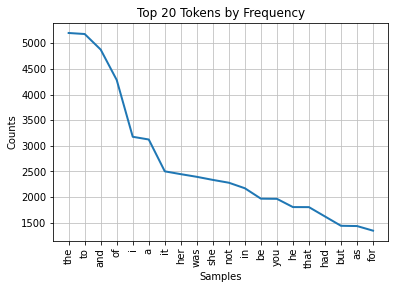

In [50]:
# Using the bound method plot(), we can make a frequency plot:
fdist.plot(20, title="Top 20 Tokens by Frequency")

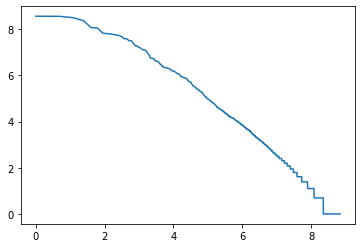

In [51]:
# A brief illustration of Zipf's law
import math # We will need the log() function
import matplotlib.pyplot as plt # And we will make a simple plot

# Calculate a list of the logs of the word frequency values using
# a list comprehension and sorting from largest to smallest.
log_freqs = [math.log(v) for v in sorted(fdist.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs))]

plt.plot(log_ranks, log_freqs) # Show the result

Now you repeat the word frequency analysis process using the list of tokens that has the stop words taken out. This was created several blocks ago and has the name emmanostops. Add some lines of code in the next block to conduct the frequency analysis and finish up with a Zipf plot. 

In [73]:
#
# Exercise 2.7: Repeat word frequency analysis without stop words.
#
from nltk import FreqDist
fdistemma = FreqDist(emmanostops) # This creates a list of frequencies for words
fdistemmakeys = list(fdistemma.keys()) # The keys are the words/tokens
topkeysemma = fdistemma.most_common(20) #The most common 20 words in emmanostops
for item in topkeysemma:
  print("The word", item[0], "occurs", item[1], "times.")

print("\n\nNumber of hapaxes : ",len(fdistemma.hapaxes()))
fdistemma_hap=fdistemma.hapaxes()
print(fdistemma_hap[:20])

The word emma occurs 855 times.
The word could occurs 835 times.
The word would occurs 818 times.
The word miss occurs 599 times.
The word must occurs 566 times.
The word harriet occurs 496 times.
The word much occurs 484 times.
The word said occurs 483 times.
The word one occurs 447 times.
The word every occurs 435 times.
The word weston occurs 430 times.
The word thing occurs 392 times.
The word think occurs 383 times.
The word well occurs 378 times.
The word elton occurs 378 times.
The word knightley occurs 373 times.
The word little occurs 359 times.
The word never occurs 358 times.
The word know occurs 335 times.
The word might occurs 325 times.


Number of hapaxes :  2682
['austen', 'vex', 'indistinct', 'caresses', 'nominal', 'mildness', 'impose', 'esteeming', 'disadvantages', 'misfortunes', 'mournful', 'debt', 'tenderer', 'valetudinarian', 'amounting', 'equals', 'lieu', 'awoke', 'chatted', 'housemaid']


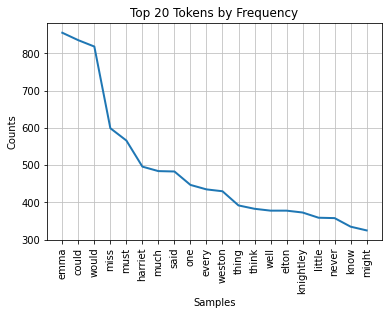

In [74]:
#Frequency plot of emmanostops
fdistemma.plot(20, title="Top 20 Tokens by Frequency")

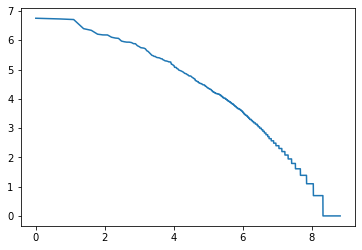

In [77]:
#Zipf Plot

# Calculate a list of the logs of the word frequency values using
# a list comprehension and sorting from largest to smallest.
log_freqs_emmanostops = [math.log(v) for v in sorted(fdistemma.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs_emmanostops))]

plt.plot(log_ranks, log_freqs_emmanostops) # Zipf law plot

So far, we've worked with the words as they have originally appeared in the text. In this section we will use the Porter stemmer to stem emmanostops and then repeat the frequency analysis that we did previously to see how our vocabulary has changed.

In [78]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

stem_nostops = [stemmer.stem(w) for w in emmanostops]

stem_nostops[0:20]

['emma',
 'jane',
 'austen',
 'volum',
 'chapter',
 'emma',
 'woodhous',
 'handsom',
 'clever',
 'rich',
 'comfort',
 'home',
 'happi',
 'disposit',
 'seem',
 'unit',
 'best',
 'bless',
 'exist',
 'live']

In [79]:
print(len(emmanostops)) # The original number of tokens
print(len(stem_nostops)) # The total number of stemmed tokens
print(len(set(emmanostops))) # # The vocabulary size unstemmed
print(len(set(stem_nostops))) # The vocabulary size stemmed

69617
69617
6807
4262


In [80]:
#
# Exercise 2.8: Repeat word frequency analysis using stem_nostops. Create 
# appropriate graphs as shown above.
#
from nltk import FreqDist
fdist_stem = FreqDist(stem_nostops) # This creates a list of frequencies for words
fdist_stemkeys = list(fdist_stem.keys()) # The keys are the words/tokens
topkey_stem = fdist_stem.most_common(20) #The most common 20 words in emmanostops
for item in topkey_stem:
  print("The word", item[0], "occurs", item[1], "times.")

print("\n\nNumber of hapaxes : ",len(fdist_stem.hapaxes()))
fdist_stem_hap=fdist_stem.hapaxes()
print(fdist_stem_hap[:20])

The word emma occurs 855 times.
The word could occurs 835 times.
The word would occurs 818 times.
The word miss occurs 611 times.
The word must occurs 566 times.
The word harriet occurs 496 times.
The word much occurs 484 times.
The word said occurs 483 times.
The word think occurs 466 times.
The word thing occurs 454 times.
The word one occurs 451 times.
The word weston occurs 438 times.
The word everi occurs 435 times.
The word elton occurs 399 times.
The word say occurs 392 times.
The word know occurs 391 times.
The word knightley occurs 380 times.
The word well occurs 378 times.
The word littl occurs 362 times.
The word never occurs 358 times.


Number of hapaxes :  1344
['austen', 'caress', 'nomin', 'disadvantag', 'debt', 'valetudinarian', 'lieu', 'awok', 'housemaid', 'curtsey', 'needlework', 'bang', 'backgammon', 'speck', 'gainer', 'deathb', 'broadway', 'drizzl', 'mitchel', 'grievous']


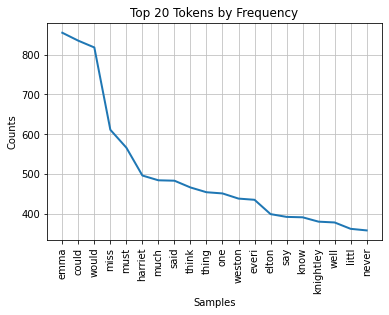

In [81]:
#Frequency plot of stem_nostops
fdist_stem.plot(20, title="Top 20 Tokens by Frequency")

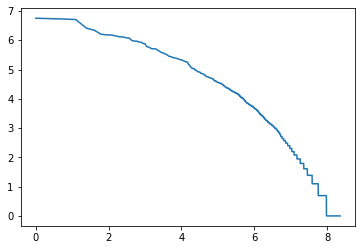

In [82]:
#Zipf Plot for stem_nostops

# Calculate a list of the logs of the word frequency values using
# a list comprehension and sorting from largest to smallest.
log_freqs_stem = [math.log(v) for v in sorted(fdist_stem.values(), reverse=True)]

# Make a list of integers (i.e., ranks) and calculate their logs
log_ranks = [math.log(r+1) for r in range(len(log_freqs_stem))]

plt.plot(log_ranks, log_freqs_stem) # Zipf law plot

###Part Three

Here's a basic introduction to regular expressions - a kind of language-within-a-language for pattern matching. We will use Python's "re" package for regular expressions. The re.compile() function preprocesses our pattern so that it can easily be reused. 

In [83]:
# Rather than a whole book, let's just start with one sentence:
sentence = "thomas jefferson began building monticello at the age of twenty-six."

# Now get set up to build a regular expression
import re
pattern = re.compile('^[a-z]+')
type(pattern) # What is it?

re.Pattern

In [84]:
# Let's see what this pattern can do for us
print(pattern.match(sentence)) # Show the details of when a match occurs

<re.Match object; span=(0, 6), match='thomas'>


So the pattern that we saved using this command, re.compile('^[a-z]+'), looks for the start of a string with the ^ character, followed by any number of the characters a through z (lowercase). This yielded one match that starts at character zero and goes for six characters in total. So we have successfully parsed the first word of the sentence, but what about the rest? Let's do two things: first, if we get rid of the ^ then we won't just match at the beginning of the sentence. Second, if we use findall() instead of match(), we can get a complete list of matches rather than just the first one.

In [85]:
pattern = re.compile('[a-z]+')
print(pattern.findall(sentence))

['thomas', 'jefferson', 'began', 'building', 'monticello', 'at', 'the', 'age', 'of', 'twenty', 'six']


Note that we have saved all the words and discarded the spaces and the punctuation, including the dash in the hyphenated phrase, twenty-six. As we saw earlier in the lab, Python provides a similar capability with the .split() bound method that can be applied to any string:

In [86]:
# Space is the default for the splitting character, but we provide it explicitly
# here just to make the point that this is what the method does.
sentence.split(sep=' ') 


['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 'twenty-six.']

In [87]:
# Note how the dash and period are retained in the example above.
# A regular expression can also be used to do splits, like this pattern
# that matches any number of whitespace characters and performs splits
# using those matches:
spattern = re.compile('\s+')
spattern.split(sentence)

['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 'twenty-six.']

In both of the preceding examples, you should be able to explain why the final token contains both the dash character and the period. What do you think of this result? Is it better to keep dashes in hyphenated phrases? Should punctuation tokens like periods be peeled off into separate tokens?

In [ ]:
#It is better to use regex patter matching like [a-z]+
#As it can detect alphabets and symbols separately. 
#Using just split() would retain punctuations and doesnt tokenize so well. 

In [88]:
# The NLTK package also contains a tokenizer that can use regular expressions
# to do the splitting. Here's an example:
from nltk.tokenize import RegexpTokenizer

# This matches \w (any word character) or the end of a string or any number of 
# digits or any number of characters that are not a space.
my_tokenizer = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
my_tokenizer.tokenize(sentence)

['thomas',
 'jefferson',
 'began',
 'building',
 'monticello',
 'at',
 'the',
 'age',
 'of',
 'twenty',
 '-six.']

The complete set of examples above demonstrate that even for this one relatively simple sentence, a tokenizer can be programmed to behave in many different ways. We see variation, in particular, around the handling of hyphenated words and punctuation. Other important issues surround the handling of contractions, abbreviations, numeric strings, and multi-word noun phrases such as New York or New York City. Now let's use the RegEx tokenizer to try to discover the most commonly used proper names.

In [89]:
new_tokens = my_tokenizer.tokenize(emmatext)

# Now grab all of the tokens that begin with an upper case letter
proper_names = [w for w in new_tokens if w[0].isupper()]
pndist = FreqDist(proper_names) # This creates a list of frequencies for words

pndist.most_common(23)

[('I', 2640),
 ('Mr', 1097),
 ('Emma', 835),
 ('Mrs', 675),
 ('Miss', 562),
 ('She', 493),
 ('Harriet', 488),
 ('Weston', 438),
 ('Knightley', 385),
 ('Elton', 385),
 ('He', 375),
 ('Woodhouse', 313),
 ('The', 307),
 ('It', 306),
 ('Jane', 289),
 ('Fairfax', 241),
 ('Churchill', 222),
 ('But', 203),
 ('Frank', 200),
 ('You', 173),
 ('Hartfield', 159),
 ('And', 152),
 ('Bates', 148)]

Now we can see the major characters from the book. Here's an incomplete list excerpted from Sparknotes.com:

* Emma Woodhouse: The protagonist of the novel. 
* John Knightley: Emma’s brother-in-law.
* Harriet Smith: Emma’s protégé and the object of her matchmaking schemes.
* Miss Bates: A middle-aged spinster.
* Jane Fairfax: Miss Bates’s niece. 
* Frank Churchill: Mr. Weston’s son and Mrs. Weston’s stepson.

So the upshot of a few processing steps is that we now have a meaningful insight into the contents of the book. Next, repeat that analysis on a different Jane Austen book, Persuasion.

In [90]:
file1 = nltk.corpus.gutenberg.fileids()[1] # Extract the file id
print(file1)
perstext = nltk.corpus.gutenberg.raw(file1) # Get the raw text of the book
print (len(perstext)) # This tells the length of the string in characters
print(type(perstext)) # And this shows the type of the object.
perstext[0:80] # And here's the first few characters

austen-persuasion.txt
466292
<class 'str'>


'[Persuasion by Jane Austen 1818]\n\n\nChapter 1\n\n\nSir Walter Elliot, of Kellynch Ha'

In [ ]:
#
# Exercise 2.9: For the remaining time in the lab session, repeat the corpus
# analysis that we conducted on Emma using the text of Persuasion. Here are the
# key tasks to accomplish for this kind of descriptive analysis:
#
# The number of tokens in the text
# The 20 most frequently occuring tokens
# The number of tokens without stop words
# The number of unique tokens (the vocabulary size)
# The number of unique tokens after stemming
# A plot illustrating Zipf's law using token frequency
# The number of tokens that begin with an uppercase letter
# The top 20-25 tokens that begin with an uppercase letter
# A comparison of those tokens with the names of the main characters
#

In [93]:
#Take persuasion
import nltk
nltk.download('gutenberg')
print(nltk.corpus.gutenberg.fileids())
file1 = nltk.corpus.gutenberg.fileids()[1] # Extract the book names
print(file1)
pers = nltk.corpus.gutenberg.raw(file1) # Get the raw text of the book
print (len(pers)) # This tells the length of the string in characters
print(type(pers)) # And this shows the type of the emmatext object.


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
austen-persuasion.txt
466292
<class 'str'>


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
#
# Exercise 2.10: Organize the code that you created above into a function
# that takes as input a string of any length and produces as printed output
# all of the diagnostics and graphs noted above.
#

You have probably have reached this point before the end of the class period. Download a copy of this notebook with all of your exercises completed and the outputs of each code block retained. Then upload that file (which will have the .ipynb extension) to the appropriate drop box on Blackboard.

In the notes area for your submission, write a note indicating how many of the exercises you completed.

If there is additional time left in the class period, solve this problem:
Write a loop that processes all 18 of the Gutenberg books that are provided by the NLTK library. Develop a new copy of the function from Exercise 2.10 so that it does not produce any output with graphs or lists, but rather it silently returns a data structure (preferably a dict) with the statistical values from Exercise 2.9 (i.e., the five scalar numeric values). Call the new function from within the loop and print the results returned by the function after each call. Extra challenge: Create a Pandas dataset containing all 18 books, using the data returned from your function.   